<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Decision Tree Classification Model</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

pd.set_option('Display.max_rows', None)

In [2]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
df.shape

(400, 11)

In [4]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Shelveloc, Urban, and US are Categorical columns they need to encoded to form interger values


In [5]:
le = preprocessing.LabelEncoder() #label encoder instance

df['ShelveLoc']  = le.fit_transform(df.ShelveLoc)  
df['Urban']      = le.fit_transform(df.Urban)
df['US']         = le.fit_transform(df.US)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
df.ShelveLoc = df.ShelveLoc.astype('category')
df.Urban = df.Urban.astype('category')
df.US = df.US.astype('category')
df.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.0,400.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,282.0,258.0
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


### mean sale is 7.5 thousands so we will use it as the base for comparison 

In [7]:
df['Sales_Stat'] = ''

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Stat
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,


In [9]:
df.loc[df['Sales']>= 7.5, 'Sales_Stat'] = 'Good'
df.loc[df['Sales'] < 7.5, 'Sales_Stat'] = 'BAD'
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Stat
0,9.50,138,73,11,276,120,0,42,17,1,1,Good
1,11.22,111,48,16,260,83,1,65,10,1,1,Good
2,10.06,113,35,10,269,80,2,59,12,1,1,Good
3,7.40,117,100,4,466,97,2,55,14,1,1,BAD
4,4.15,141,64,3,340,128,0,38,13,1,0,BAD


### Model building

In [10]:
x = df.iloc[:,1:-1]
y = df.iloc[:,11]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 2)

In [11]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=9)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

[Text(157.47130102040816, 206.56799999999998, 'X[4] <= 88.5\nentropy = 1.0\nsamples = 320\nvalue = [164, 156]'),
 Text(94.8030612244898, 184.824, 'X[1] <= 46.0\nentropy = 0.196\nsamples = 33\nvalue = [1, 32]'),
 Text(87.9704081632653, 163.07999999999998, 'X[0] <= 99.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(81.13775510204081, 141.336, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(94.8030612244898, 141.336, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(101.63571428571429, 163.07999999999998, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(220.13954081632653, 184.824, 'X[4] <= 131.5\nentropy = 0.987\nsamples = 287\nvalue = [163, 124]'),
 Text(160.14030612244898, 163.07999999999998, 'X[6] <= 63.5\nentropy = 0.998\nsamples = 207\nvalue = [98, 109]'),
 Text(108.46836734693878, 141.336, 'X[2] <= 8.5\nentropy = 0.93\nsamples = 142\nvalue = [49, 93]'),
 Text(66.61836734693878, 119.592, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 85\nvalue = [42, 43]'),
 Text(34.1

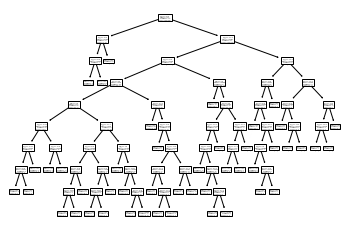

In [12]:
tree.plot_tree(model)

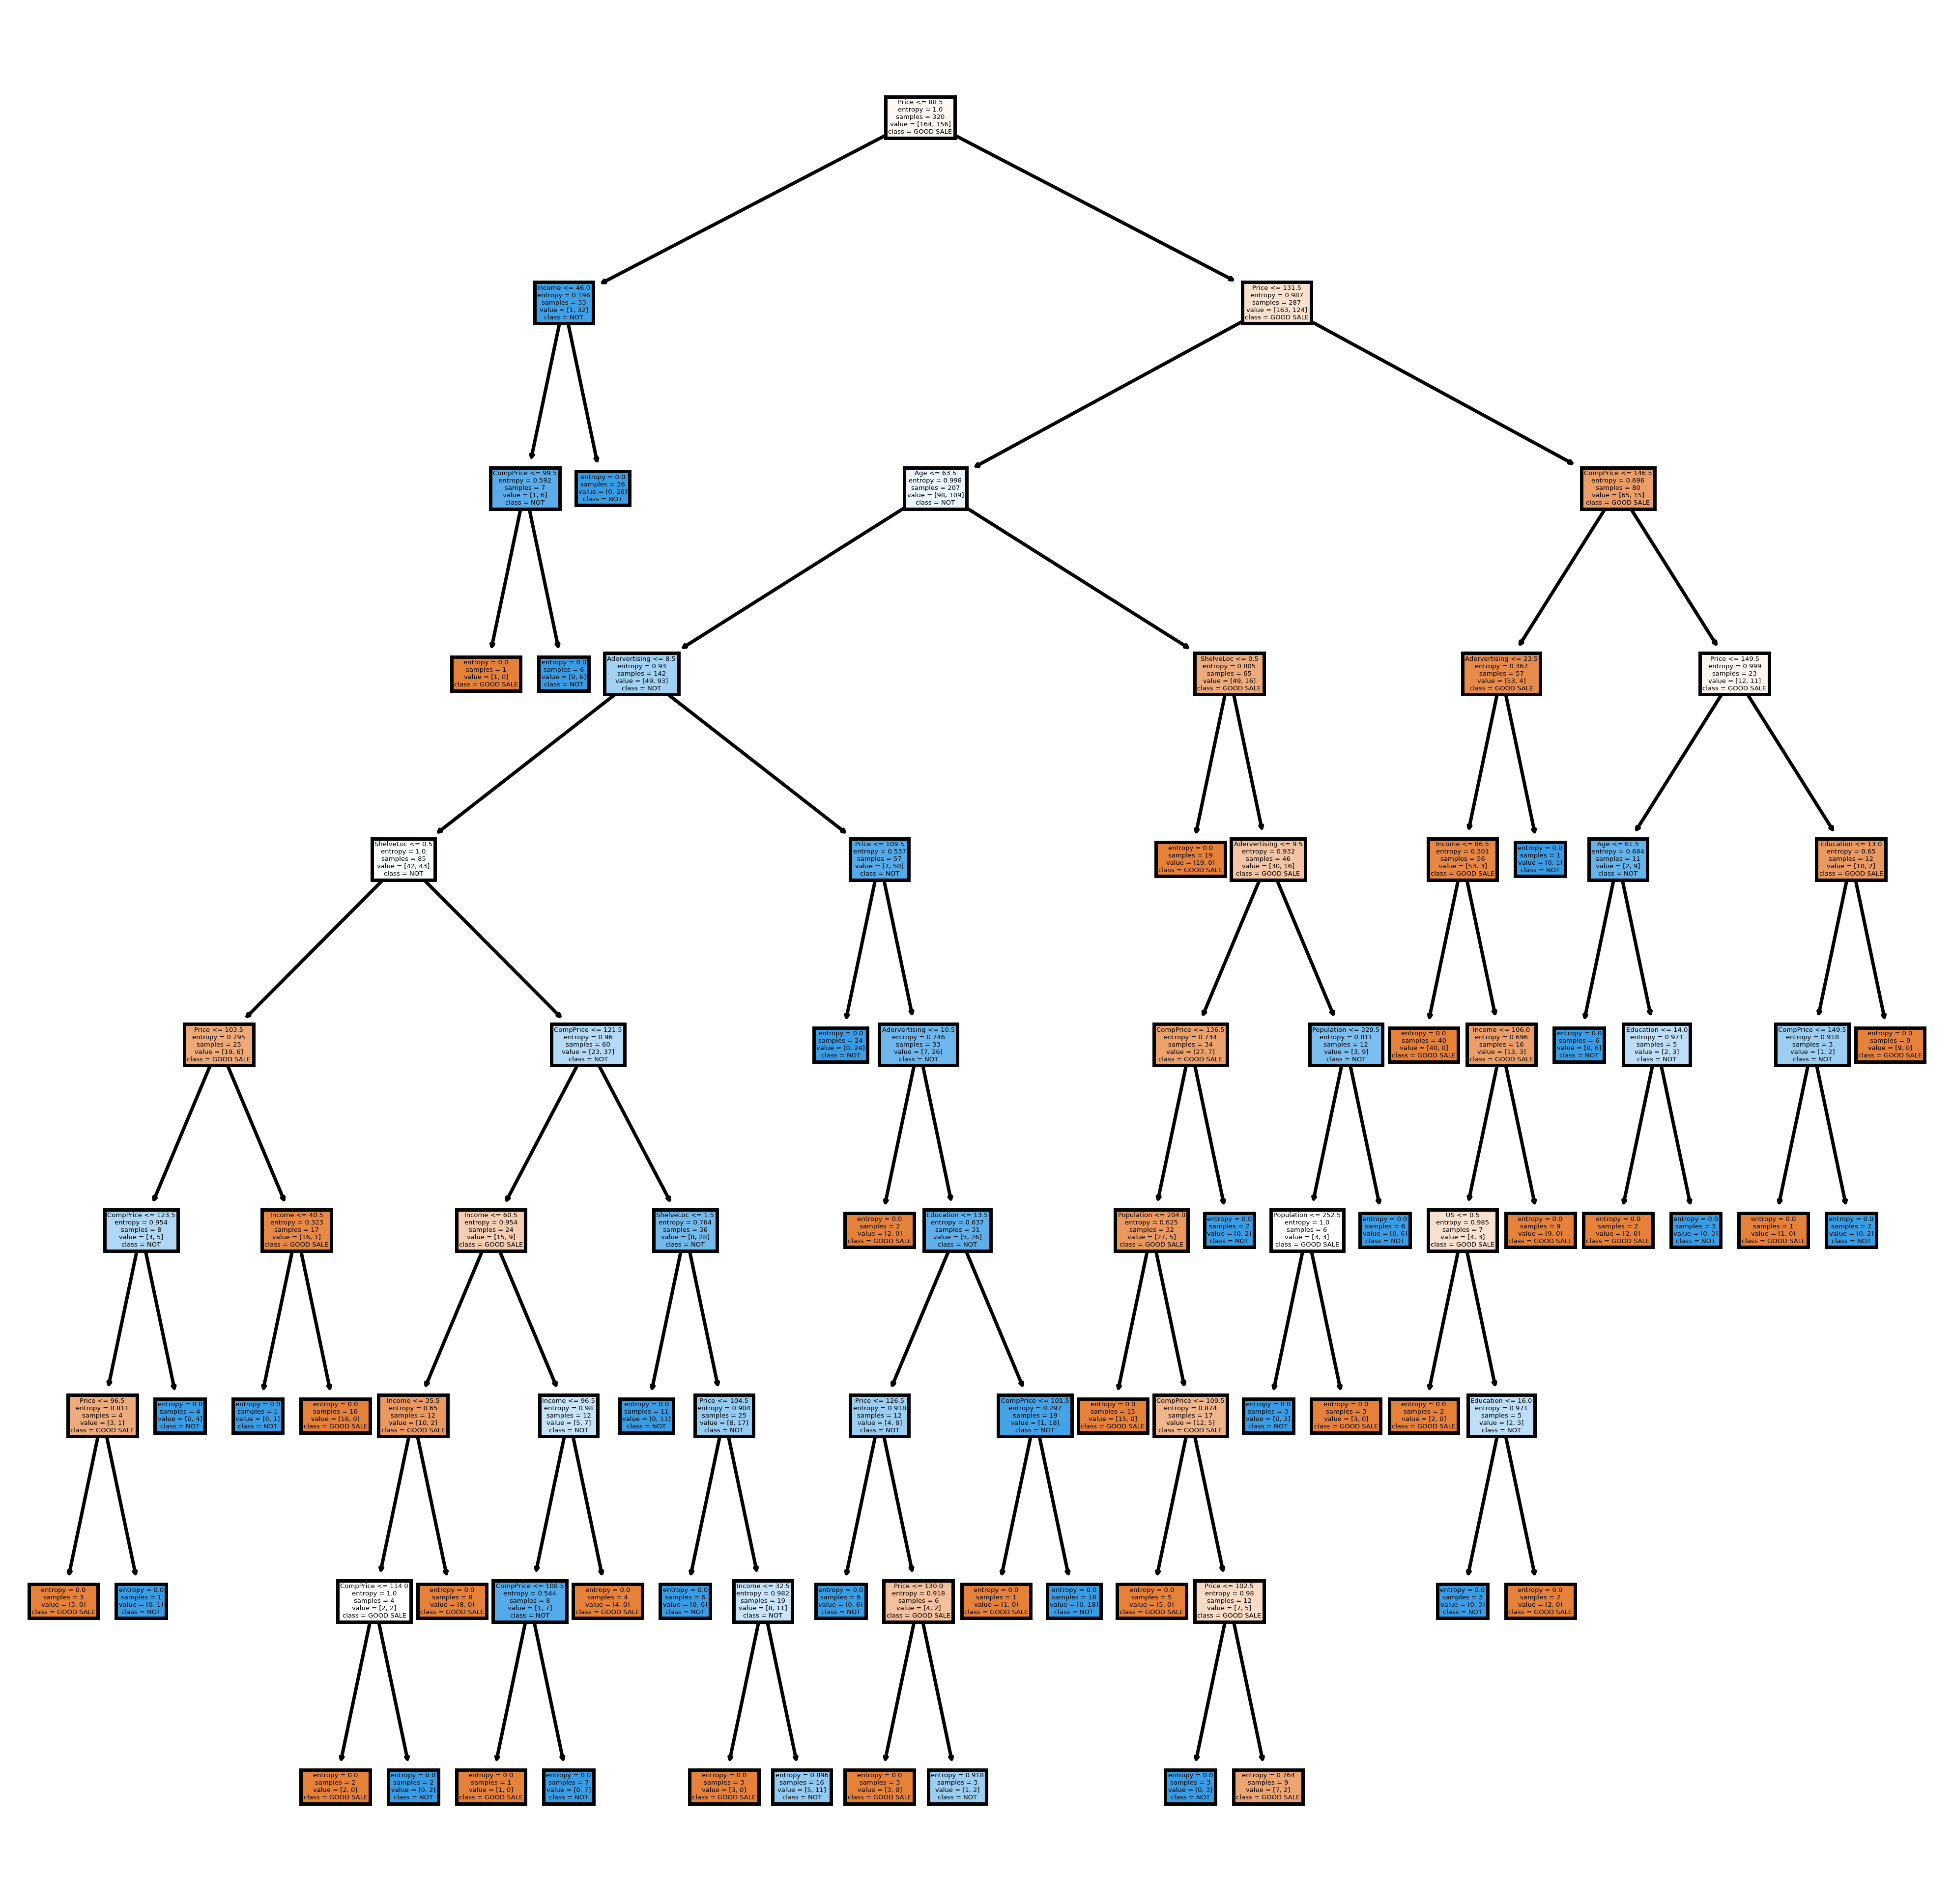

In [13]:
fn=['CompPrice','Income','Adervertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['GOOD SALE','NOT']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [14]:
prediction = model.predict(x_test)

In [15]:
prediction

array(['Good', 'BAD', 'Good', 'BAD', 'BAD', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'BAD', 'Good', 'BAD', 'Good',
       'Good', 'BAD', 'Good', 'Good', 'Good', 'BAD', 'Good', 'BAD',
       'Good', 'BAD', 'Good', 'Good', 'BAD', 'BAD', 'BAD', 'BAD', 'Good',
       'Good', 'Good', 'BAD', 'Good', 'Good', 'Good', 'Good', 'BAD',
       'Good', 'Good', 'BAD', 'BAD', 'BAD', 'Good', 'Good', 'BAD', 'Good',
       'BAD', 'Good', 'BAD', 'Good', 'Good', 'Good', 'BAD', 'BAD', 'Good',
       'Good', 'BAD', 'Good', 'Good', 'BAD', 'BAD', 'BAD', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'BAD', 'BAD', 'Good', 'Good',
       'BAD', 'BAD', 'BAD', 'Good'], dtype=object)

In [16]:
pd.crosstab(y_test,prediction)

col_0,BAD,Good
Sales_Stat,,
BAD,24,13
Good,8,35


In [17]:
model.score(x_test, y_test)

0.7375

### Hyper Parameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [19]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004020,0.004882,0.003485,0.004346,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.7375,0.6250,0.6500,0.6500,0.6750,0.6675,0.038406,13
1,0.002004,0.004007,0.002000,0.004000,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.7500,0.6625,0.7875,0.6375,0.6750,0.7025,0.056679,12
2,0.004000,0.004899,0.002000,0.004000,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.7625,0.7375,0.7625,0.5875,0.6875,0.7075,0.065955,7
3,0.004000,0.004899,0.002000,0.004000,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.7875,0.7125,0.8000,0.5875,0.6375,0.7050,0.082765,11
4,0.004000,0.004898,0.002000,0.004000,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.7625,0.7250,0.8000,0.6375,0.7000,0.7250,0.055340,2
5,0.003599,0.004453,0.002649,0.003253,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.7750,0.7375,0.8000,0.6000,0.7250,0.7275,0.069101,1
6,0.005601,0.001854,0.002798,0.001602,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.7875,0.6250,0.8000,0.6125,0.7000,0.7050,0.078502,10
7,0.003223,0.003704,0.002403,0.003883,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.6875,0.6250,0.6625,0.6375,0.6625,0.6550,0.021794,14
8,0.004000,0.004898,0.002000,0.004000,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.7875,0.6625,0.8000,0.6250,0.6625,0.7075,0.071851,7
9,0.004000,0.004899,0.002000,0.004000,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.8125,0.6625,0.7750,0.6250,0.6625,0.7075,0.072715,7


In [20]:
results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'criterion': 'gini', 'max_depth': 4}",0.6675
1,"{'criterion': 'gini', 'max_depth': 5}",0.7025
2,"{'criterion': 'gini', 'max_depth': 6}",0.7075
3,"{'criterion': 'gini', 'max_depth': 7}",0.7050
4,"{'criterion': 'gini', 'max_depth': 8}",0.7250
5,"{'criterion': 'gini', 'max_depth': 9}",0.7275
6,"{'criterion': 'gini', 'max_depth': 10}",0.7050
7,"{'criterion': 'entropy', 'max_depth': 4}",0.6550
8,"{'criterion': 'entropy', 'max_depth': 5}",0.7075
9,"{'criterion': 'entropy', 'max_depth': 6}",0.7075


In [21]:
results.sort_values(['mean_test_score'], ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.003599,0.004453,0.002649,0.003253,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.7750,0.7375,0.8000,0.6000,0.725,0.7275,0.069101,1
4,0.004000,0.004898,0.002000,0.004000,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.7625,0.7250,0.8000,0.6375,0.700,0.7250,0.055340,2
12,0.002000,0.004000,0.002000,0.004000,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.7875,0.7125,0.8000,0.6500,0.675,0.7250,0.059687,2
13,0.002000,0.004000,0.002000,0.004000,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.8250,0.6875,0.7500,0.6625,0.675,0.7200,0.060519,4
10,0.004000,0.004899,0.002000,0.004000,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.8000,0.7000,0.7875,0.6500,0.650,0.7175,0.065000,5
